# Sparse Auto-Encoder

A sparse autoencoder __panalizes the number of activations__.

Many ways to obtain sparsity:

- matching __pursuit algorithm__;
- __k-activations selection__ regularizer;
- __regularization__ penalty term:
 $\Large \mathcal{L}_s(x,\hat{x};\theta) = \mathcal{L}(x,\hat{x};\theta) + \lambda |\theta|_1$

Different levels of regularization can be achieved with different $p$-norms:

<img src="images/norms.png" width="600pt"/>


In [7]:
# Loading the tools:
%run autoencoders.py

print("Creating the net...")
autoencoder, encoder, decoder = create_net(l1_regularization=1e-2)

Creating the net...


Loading the data...


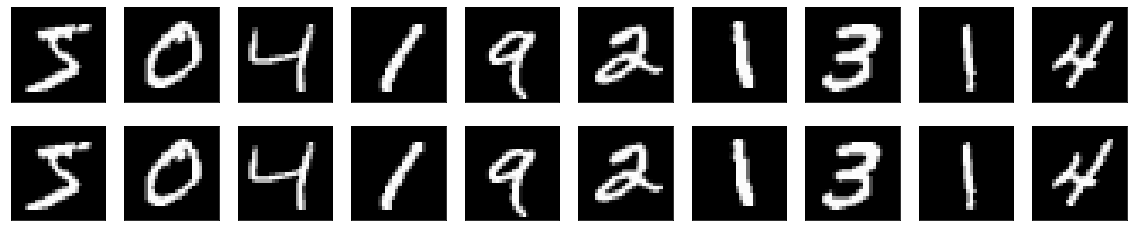

In [8]:
print("Loading the data...")

x_train, y_train, x_test, y_test = load_data()

imshowcompare(x_train, y_train)

In [9]:
from tensorflow.keras.callbacks import TensorBoard

print("Training SAE...")

train(
    net=autoencoder,
    train_data=(x_train, y_train), 
    validation_data=(x_test, y_test),
    callbacks=[TensorBoard(log_dir='generated/SAE')]
)


Training SAE...
Epoch 1/30
938/938 [==============================] - 58s 60ms/step - loss: 0.3714 - val_loss: 0.1790
Epoch 2/30
938/938 [==============================] - 51s 55ms/step - loss: 0.1726 - val_loss: 0.1553
Epoch 3/30
938/938 [==============================] - 53s 57ms/step - loss: 0.1541 - val_loss: 0.1460
Epoch 4/30
938/938 [==============================] - 51s 55ms/step - loss: 0.1443 - val_loss: 0.1405
Epoch 5/30
938/938 [==============================] - 52s 55ms/step - loss: 0.1392 - val_loss: 0.1349
Epoch 6/30
938/938 [==============================] - 57s 61ms/step - loss: 0.1358 - val_loss: 0.1324
Epoch 7/30
938/938 [==============================] - 52s 56ms/step - loss: 0.1330 - val_loss: 0.1307
Epoch 8/30
938/938 [==============================] - 54s 58ms/step - loss: 0.1311 - val_loss: 0.1280
Epoch 9/30
938/938 [==============================] - 51s 55ms/step - loss: 0.1289 - val_loss: 0.1267
Epoch 10/30
938/938 [==============================] - 52s 56ms/st

In [10]:
# Saving the models separatedly and together:
autoencoder.save('generated/sae_autoencoder')
encoder.save('generated/sae_encoder')
decoder.save('generated/sae_decoder')

INFO:tensorflow:Assets written to: generated/sae_autoencoder/assets
INFO:tensorflow:Assets written to: generated/sae_encoder/assets
INFO:tensorflow:Assets written to: generated/sae_decoder/assets


In [11]:
from tensorflow.keras.models import load_model

# Loading the models back:
autoencoder = load_model('generated/sae_autoencoder')
encoder = load_model('generated/sae_encoder')
decoder = load_model('generated/sae_decoder')

Using the encoder/decoder pair on original images...


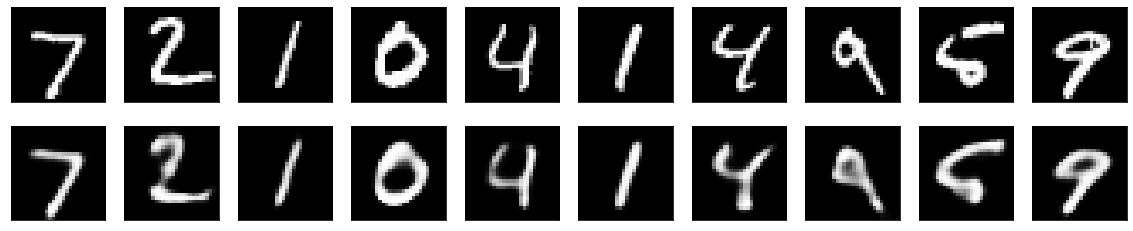

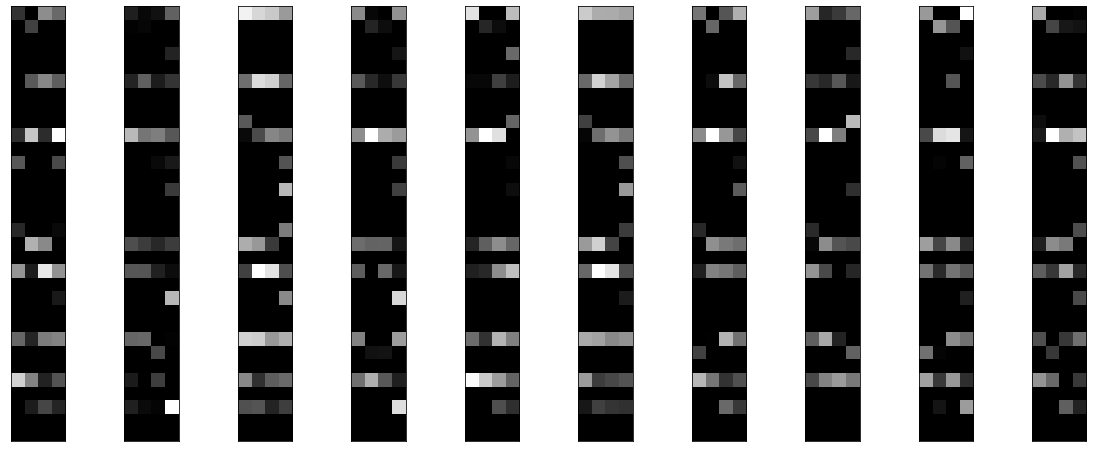

In [12]:
print("Using the encoder/decoder pair on original images...")

encoded_imgs = encoder.predict(y_test)
decoded_imgs = decoder.predict(encoded_imgs)

imshowcompare(y_test, decoded_imgs)

plotfeatures(encoded_imgs)

## Contractive Autoencoders (CAE)

Other regularization penalties allow to enforce other properties.

CAEs enforce local stability by penalizing the L2 norm of the Jacobian:

$$\Large
\mathcal{L}(x,\hat{x};\theta) = \mathcal{L}(x,\hat{x};\theta) + \lambda\|\nabla_xh\|^2
$$

This technique is called _contractive_ because locally the manifold contracts:

<img src="images/cae.png" width="500pt"/>